# 实验1

## 0.数据导入

In [96]:

import pandas as pd

data = pd.read_excel('1、第3章 数据整理与显示.xls',None)
sheets = data.keys()
sheets

sheet1_satisfication = data['满意度']
sheet2_wage = data['工资']
sheet3_satisfication = data['等红灯']
print(sheet1_satisfication.head())
print(sheet2_wage.head())
print(sheet3_satisfication.head())

   编号   满意度  代码
0   1  比较满意   4
1   2  非常满意   5
2   3  比较满意   4
3   4  非常满意   5
4   5  非常满意   5
   编号    工资
0  27  2300
1  13  2400
2  11  2500
3  30  2500
4  44  2600
   编号 等红灯的时候做什么  代码
0   1    静静等待红灯   7
1   2    静静等待红灯   7
2   3       打电话   2
3   4    静静等待红灯   7
4   5       听音乐   5


## 1.分类汇总、数据透视表、直方图、频数编制

### 1.1分类汇总

In [97]:
s1 = sheet1_satisfication.groupby(['代码','满意度']).count()
s1.columns = ['汇总']
s1

,,汇总
代码,满意度,
1,非常不满意,4
2,比较不满意,31
3,一般,56
4,比较满意,132
5,非常满意,77


In [98]:
s2 = sheet2_wage.groupby('工资').count()
s2.columns = ['频数']
s2

,频数
工资,
2300,1
2400,1
2500,2
2600,1
2700,2
2800,1
3000,2
3100,1
3300,1


In [99]:
s3 = sheet3_satisfication.groupby(['代码','等红灯的时候做什么']).count()
s3.columns = ['计数']
s3

,,计数
代码,等红灯的时候做什么,
1,拿出手机，无目的地翻看,13
2,打电话,6
3,手机上网,6
4,手机打游戏,2
5,听音乐,7
6,看报纸、杂志等,2
7,静静等待红灯,85
8,其他,5


### 1.2数据透视表

In [100]:
df1 = s1
df1.index = s1.index.droplevel()
df1.loc['总计'] = df1['汇总'].agg('sum')
df1

,汇总
满意度,
非常不满意,4
比较不满意,31
一般,56
比较满意,132
非常满意,77
总计,300


In [101]:
bins = [0,2500,4000,5500,7000,8500,10000,1000000]
labels = ['2500以下','2500-4000','4000-5500','5500-7000','7000-8500','8500-10000','10000以上']
df2 = pd.cut(sheet2_wage['工资'],bins,right=False,labels=labels)
df2 = pd.DataFrame(df2.value_counts(sort=False))  # sort=False 防止2500以下跑到中间去.（buzhi
df2.columns = ['人数']
df2.loc['总计'] = df2['人数'].agg('sum')
df2

,人数
2500以下,2
2500-4000,17
4000-5500,12
5500-7000,7
7000-8500,3
8500-10000,2
10000以上,2
总计,45


In [102]:
df3 = s3
df3.index = s3.index.droplevel()
df3.loc['总计'] = df3['计数'].agg('sum')
df3

,计数
等红灯的时候做什么,
拿出手机，无目的地翻看,13
打电话,6
手机上网,6
手机打游戏,2
听音乐,7
看报纸、杂志等,2
静静等待红灯,85
其他,5
总计,126


### 1.3直方图

In [103]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '非常不满意'),
  Text(1, 0, '比较不满意'),
  Text(2, 0, '一般'),
  Text(3, 0, '比较满意'),
  Text(4, 0, '非常满意')])

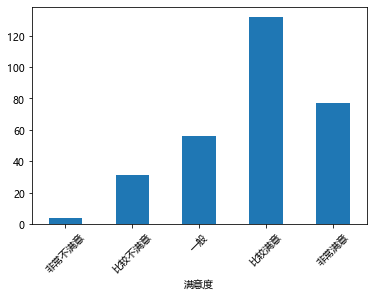

In [104]:
df1.iloc[:-1,0].plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2500以下'),
  Text(1, 0, '2500-4000'),
  Text(2, 0, '4000-5500'),
  Text(3, 0, '5500-7000'),
  Text(4, 0, '7000-8500'),
  Text(5, 0, '8500-10000'),
  Text(6, 0, '10000以上')])

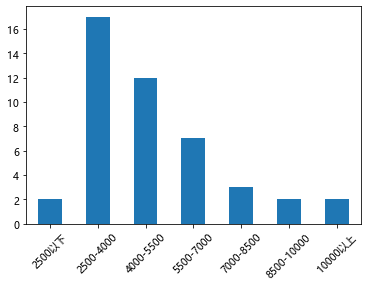

In [105]:
df2.iloc[:-1,0].plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '拿出手机，无目的地翻看'),
  Text(1, 0, '打电话'),
  Text(2, 0, '手机上网'),
  Text(3, 0, '手机打游戏'),
  Text(4, 0, '听音乐'),
  Text(5, 0, '看报纸、杂志等'),
  Text(6, 0, '静静等待红灯'),
  Text(7, 0, '其他')])

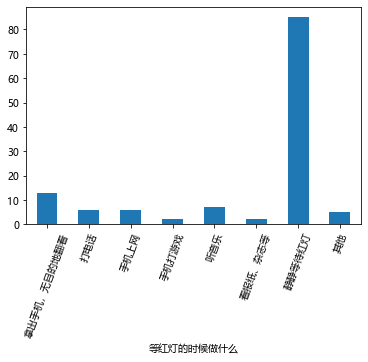

In [106]:
df3.iloc[:-1,0].plot(kind='bar')
plt.xticks(rotation=70)

### 1.4频数编制
频数编制的结果与分类汇总一致 <br>
下面为数据分布直方图:

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

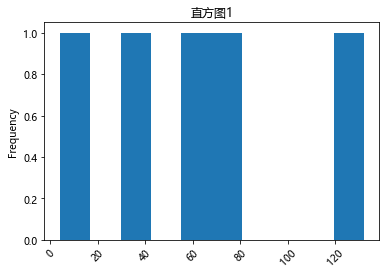

In [107]:
df1.iloc[:-1,0].plot(kind='hist',title='直方图1')
plt.xticks(rotation=45)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

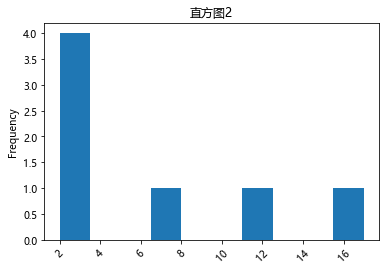

In [108]:
df2.iloc[:-1,0].plot(kind='hist',title='直方图2')
plt.xticks(rotation=45)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

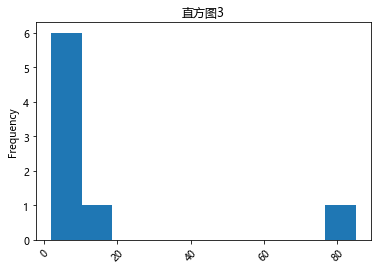

In [109]:
df3.iloc[:-1,0].plot(kind='hist',title='直方图3')
plt.xticks(rotation=45)

## 2.Makeup2007

数据导入

In [110]:
makeup_data = pd.read_excel('2、Makeup2007.xls')
makeup_data.head()

,Transaction number,Name,Date,Product,Units,Dollars,Location
0,1,Betsy,38078,lip gloss,45,137.204558,south
1,2,Hallagan,38056,foundation,50,152.007303,midwest
2,3,Ashley,38408,lipstick,9,28.719483,midwest
3,4,Hallagan,38859,lip gloss,55,167.075323,west
4,5,Zaret,38155,lip gloss,43,130.602872,midwest


### 2.1
汇总每位销售人员的销售产品数量和收入总额，以及每位销售人员销售每种产品的数量与销售额

In [111]:
import numpy as np

#### 2.1.1 汇总每位销售人员的销售产品数量和收入总额

In [112]:
sales_plot1 = makeup_data.pivot_table(index='Name',values=['Dollars'],aggfunc=['count',np.sum])
sales_plot1

,count,sum
,Dollars,Dollars
Name,,
Ashley,197,25947.235264
Betsy,217,28561.530281
Cici,230,27590.573172
Colleen,206,24890.655792
Cristina,207,23849.558721
Emilee,203,25079.864154
Hallagan,200,28434.692781
Jen,217,28941.178422


#### 2.1.2 汇总每位销售人员销售每种产品的数量与销售额

In [113]:
sales_plot2 = makeup_data.pivot_table(index='Name',values=['Dollars'],columns=['Product'],aggfunc=['count',np.sum],margins=True) # margins=True汇总
sales_plot2

count                                                       sum  \
           Dollars                                                   Dollars   
Product  eye liner foundation lip gloss lipstick mascara   All     eye liner   
Name                                                                           
Ashley          41         35        48       23      50   197   5844.948744   
Betsy           43         49        53       30      42   217   6046.534282   
Cici            53         54        48       21      54   230   5982.823291   
Colleen         33         52        42       26      53   206   3389.625314   
Cristina        43         53        47       18      46   207   5397.273636   
Emilee          57         41        48       15      42   203   7587.388980   
Hallagan        50         45        43       21      41   200   6964.621074   
Jen             54         46        42       29      46   217   7010.440514   
Zaret           62         51        41       24      36   214   8166.749063   
All            436        426       412      207     410  1891  56390.404898   

                                                                  \
                                                                   
Product     foundation     lip gloss      lipstick       mascara   
Name                                                               
Ashley     4186.058628   6053.684565   3245.442978   6617.100349   
Betsy      8043.486462   5675.650045   3968.605496   4827.253996   
Cici       6198.248632   5199.949201   3148.840650   7060.711397   
Colleen    6834.767608   5573.323725   2346.413777   6746.525368   
Cristina   5290.989935   5297.979810   2401.668343   5461.646997   
Emilee     5313.787561   5270.250313   2189.137568   4719.299731   
Hallagan   6985.734333   5603.119378   3177.871325   5703.346670   
Jen        5628.648036   5461.614790   3953.300132   6887.174950   
Zaret      6451.650057   5670.329329   2448.707163   3879.949944   
All       54933.371253  49805.901157  26879.987434  51903.009403   

                         
                         
Product             All  
Name                     
Ashley     25947.235264  
Betsy      28561.530281  
Cici       27590.573172  
Colleen    24890.655792  
Cristina   23849.558721  
Emilee     25079.864154  
Hallagan   28434.692781  
Jen        28941.178422  
Zaret      26617.385557  
All       239912.674144

### 2.2
汇总各销售点每位销售人员的销量比例

             count
           Product
Location          
east      0.241142
midwest   0.224220
south     0.275516
west      0.259122


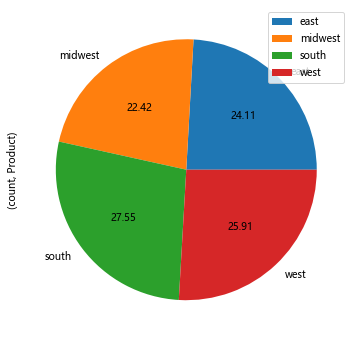

In [114]:
sales_place = makeup_data.pivot_table(index='Location',values=['Product'],aggfunc=['count'])
propotion = sales_place.div(sales_place.sum(axis=0), axis=1)  # axis=1 这一行占总列的百分数
propotion.plot(kind='pie',subplots=True,autopct='%.2f',figsize=(6, 6))
print(propotion)

### 2.3 汇总各销售点每位销售人员的销售额和销售数量

In [115]:
place_salesman = makeup_data.pivot_table(index='Location',columns=['Name'],values=['Dollars'],aggfunc=['count',np.sum],margins=True)
place_salesman

count                                                               \
         Dollars                                                                
Name      Ashley Betsy Cici Colleen Cristina Emilee Hallagan  Jen Zaret   All   
Location                                                                        
east          51    65   50      46       40     50       42   53    59   456   
midwest       40    43   60      53       50     44       42   52    40   424   
south         58    55   68      61       59     55       61   50    54   521   
west          48    54   52      46       58     54       55   62    61   490   
All          197   217  230     206      207    203      200  217   214  1891   

                   sum                                            \
               Dollars                                             
Name            Ashley         Betsy          Cici       Colleen   
Location                                                           
east       7772.704761   8767.431725   5956.320446   5713.069445   
midwest    4985.896509   4878.085848   8129.619289   6586.142169   
south      7398.565792   7732.056980   7174.448975   7785.632708   
west       5790.068203   7183.955727   6330.184462   4805.811471   
All       25947.235264  28561.530281  27590.573172  24890.655792   

                                                                  \
                                                                   
Name          Cristina        Emilee      Hallagan           Jen   
Location                                                           
east       4126.268644   6295.472056   4965.615813   6949.209483   
midwest    5870.034488   5642.196163   7378.321391   6381.320681   
south      5964.158473   6050.594346   8210.814251   7116.016774   
west       7889.097115   7091.601589   7879.941325   8494.631484   
All       23849.558721  25079.864154  28434.692781  28941.178422   

                                       
                                       
Name             Zaret            All  
Location                               
east       6825.995148   57372.087521  
midwest    4953.797616   54805.414156  
south      6864.065862   64296.354161  
west       7973.526930   63438.818306  
All       26617.385557  239912.674144

## 3.Histogram
计算蛋糕销售数量呈现的趋势，并用直方图描述

In [116]:
cakes = pd.read_excel('3、Histogram.xlsx')
cakes.head()  # 2013 - 2015 年的数据

,Date,Cakes
0,2013-01-01,79
1,2013-01-02,91
2,2013-01-03,47
3,2013-01-04,89
4,2013-01-05,112


In [117]:
cakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1095 non-null   datetime64[ns]
 1   Cakes   1095 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.2 KB


In [118]:
# 将每个月份的合并在一起了
print(cakes.groupby(cakes['Date'].apply(lambda x:x.month)).sum())

      Cakes
Date       
1      7726
2      7089
3      7848
4      7601
5      8360
6      7760
7      8085
8      7898
9      7842
10     8041
11     8045
12     8182


(array([15706., 15826., 15949., 16071., 16191., 16314., 16436., 16556.,
        16679., 16801.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

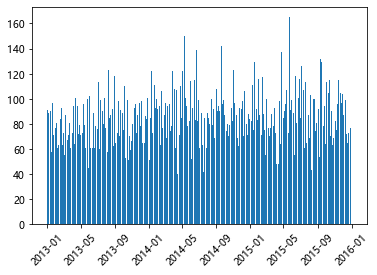

In [119]:
plt.bar(cakes['Date'],cakes['Cakes'])
plt.xticks(rotation=45)

In [120]:
# df['日期'].apply(lambda x:x.strftime('%Y/%m')) # 将日期格式设置为年月
# df.groupby(df['日期'].apply(lambda x:x.strftime('%Y/%m')))  # 按照年月groupby
cakes_plot = cakes.groupby(cakes['Date'].apply(lambda x:x.strftime('%Y/%m'))).sum() # 每年每个月份分别求和
cakes_plot

,Cakes
Date,
2013/01,2466
2013/02,2175
2013/03,2645
2013/04,2442
2013/05,2605
2013/06,2423
2013/07,2649
2013/08,2333
2013/09,2375


折线图

<AxesSubplot:xlabel='Date'>

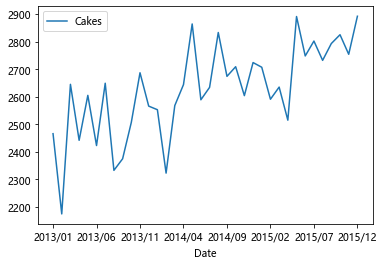

In [121]:
cakes_plot.plot()

直方图

<AxesSubplot:xlabel='Date'>

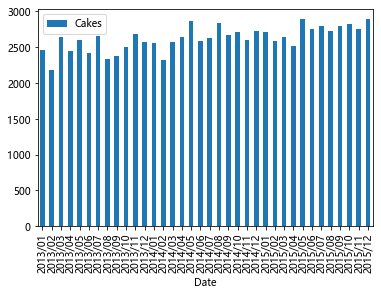

In [122]:
cakes_plot.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

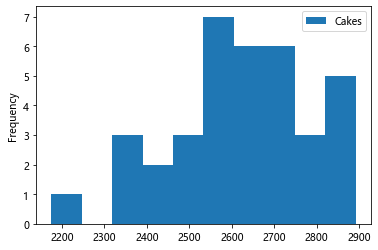

In [123]:
cakes_plot.plot(kind='hist')